Data: C:\Users\leonjye\Documents\DeepLearning\DogAndCat\dataset\training_set

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import warnings
# Filter Warnings
warnings.filterwarnings('ignore')

from PIL import Image
import os

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

In [2]:
base_dir = '/Users/leonjye/Downloads/CatAndDog'
PATH_TRAIN_CAT = base_dir + '/training_set/cats'
PATH_TRAIN_DOG = base_dir + '/training_set/dogs'
PATH_TEST_CAT = base_dir + '/test_set/cats'
PATH_TEST_CAT = base_dir + '/test_set/dogs'

DOG = 0
CAT = 1

IMG_WIDTH = 200
IMG_HEIGHT = 200
NR_PIX = IMG_HEIGHT * IMG_WIDTH
NR_CHANELS = 3 # 全彩RGB
NR_FEATURES = NR_PIX * NR_CHANELS # 輸入的特徵值就是所有pixel乘上RGB

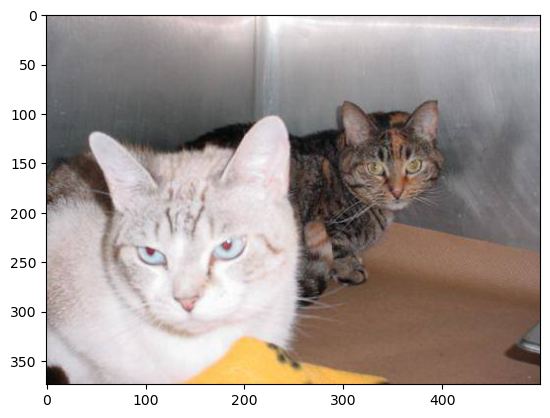

In [3]:
%matplotlib inline
from matplotlib.pyplot import imshow
import random
image = Image.open(f'{PATH_TRAIN_CAT}/cat.{random.randint(1,4000)}.jpg')#.show()
imshow(np.asarray(image))

In [4]:
def load_data_asanarray(path):
    data = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            specific_path = os.path.join(dirname, filename)
            image = Image.open(specific_path).resize((IMG_WIDTH,IMG_HEIGHT))
            img_array = np.asarray(image, dtype=np.float32)
            data.append(img_array)
    return np.asarray(data)

In [5]:
%%time
data_train_cat = load_data_asanarray(PATH_TRAIN_CAT)
data_train_dog = load_data_asanarray(PATH_TRAIN_DOG)
print('data_train_cat:', data_train_cat.shape)
print('data_train_dog:', data_train_dog.shape)

data_train_cat: (4000, 200, 200, 3)
data_train_dog: (4000, 200, 200, 3)
CPU times: user 14.1 s, sys: 1.27 s, total: 15.4 s
Wall time: 17.6 s


In [6]:
y_label_cat = np.ones(len(data_train_cat))
y_label_dog = np.zeros(len(data_train_dog))
y_label_dog

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:
x_train = np.concatenate((data_train_cat, data_train_dog))
x_train /= 255.0
y_train = np.concatenate((y_label_cat, y_label_dog))
from sklearn.model_selection import train_test_split
x_train,x_val,y_train, y_val = train_test_split(x_train,y_train, test_size=0.15, random_state=42, stratify=y_train)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((6800, 200, 200, 3), (1200, 200, 200, 3), (6800,), (1200,))

In [9]:
x_train = x_train.reshape(len(x_train), NR_FEATURES)

## Logistic Regression¶

In [10]:
class LogisticRegressionGD:
    def __init__(self, eta=0.01, n_iter=100, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y): #x: (n_samples, n_features)
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        print('w_.shape:', self.w_.shape)
        #weight: (n_features,)
        self.b_ = 0.0
        self.train_cost_ = []
        self.val_cost_ = []
        print('X.shape:', X.shape)
        print('y.shape:', y)
        for i in range(self.n_iter):
            z = self.net_input(X)
            output = self.sigmoid(z)
            errors = (output - y) #長度是筆數
            self.w_ -= self.eta * np.dot(X.T, errors)/X.shape[0]
            self.b_ -= self.eta * errors.sum()/X.shape[0]
            if i%10 == 0:
                loss = -y * np.log(output) - (1-y) * np.log(1-output)
                cost = (np.sum(loss)) / len(y)
                self.train_cost_.append(cost)
                print("Cost after iteration %i: %f" %(i, cost))
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def sigmoid(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -1000, 1000)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

w_.shape: (120000,)
X.shape: (6800, 120000)
y.shape: [0. 1. 1. ... 0. 0. 1.]
output.shape: (6800,)
Cost after iteration 0: 0.883117
output.shape: (6800,)
Cost after iteration 10: 0.738659
output.shape: (6800,)
Cost after iteration 20: 0.734453
output.shape: (6800,)
Cost after iteration 30: 0.730814
output.shape: (6800,)
Cost after iteration 40: 0.727653
output.shape: (6800,)
Cost after iteration 50: 0.724896
output.shape: (6800,)
Cost after iteration 60: 0.722478
output.shape: (6800,)
Cost after iteration 70: 0.720344
output.shape: (6800,)
Cost after iteration 80: 0.718448
output.shape: (6800,)
Cost after iteration 90: 0.716753
output.shape: (6800,)
Cost after iteration 100: 0.715226
output.shape: (6800,)
Cost after iteration 110: 0.713841
output.shape: (6800,)
Cost after iteration 120: 0.712575
output.shape: (6800,)
Cost after iteration 130: 0.711412
output.shape: (6800,)
Cost after iteration 140: 0.710335
output.shape: (6800,)
Cost after iteration 150: 0.709332
output.shape: (6800,)


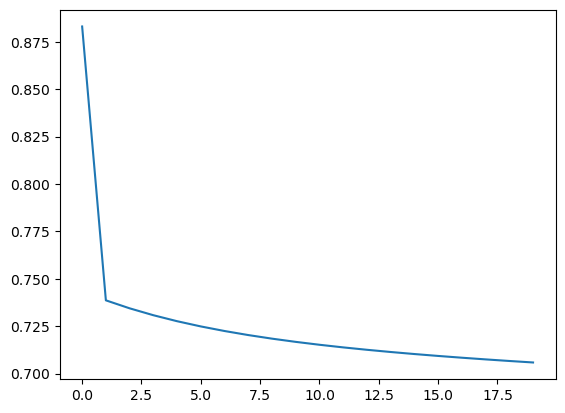

train accuracy: 54.455882352941174 %


In [11]:
lrgd = LogisticRegressionGD(eta=0.001, n_iter=200)
lrgd.fit(x_train, y_train)
plt.plot(lrgd.train_cost_)
plt.show()
y_pred = lrgd.predict(x_train)
print(f"train accuracy: {accuracy_score(y_train, y_pred)*100} %")

In [13]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[1884, 1516],
       [1581, 1819]])

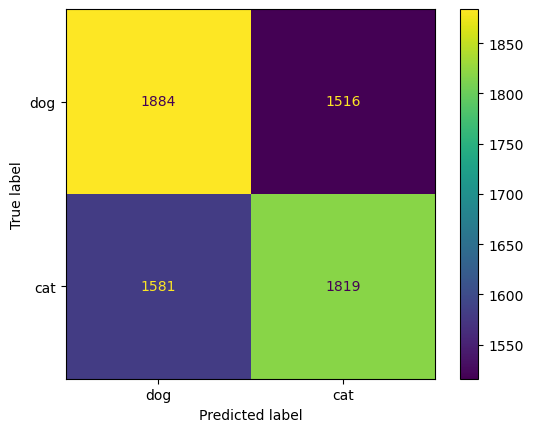

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dog', 'cat'])
disp.plot()

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)
clf.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1,
              solver='lbfgs')

In [16]:
y_pred_clf = clf.predict(x_train)
print(f"train accuracy: {accuracy_score(y_train, y_pred_clf)*100} %")

train accuracy: 93.02941176470588 %


In [17]:
cm = confusion_matrix(y_train, y_pred_clf)
cm

array([[3155,  245],
       [ 229, 3171]])

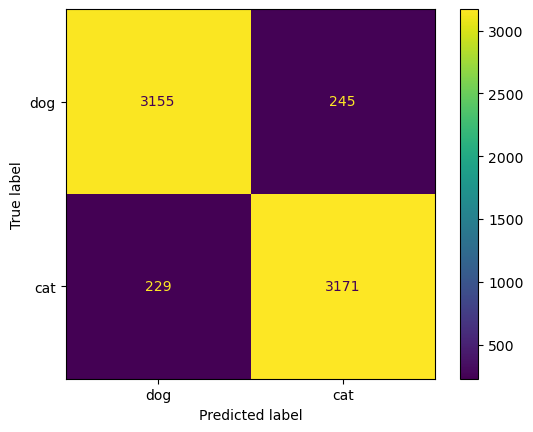

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dog', 'cat'])
disp.plot()